# Holophenotype clustermap

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('Helvetica', 9)

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_3500/436908584.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_3500/436908584.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:

%matplotlib inline
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'


w1118 = pd.read_csv(picklepath + 'W1118Dark_ele.csv')
TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = 'Light')
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = 'Light')
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = 'Light')
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = 'Light')
TrhVNCCsCh = pd.read_csv(picklepath + 'TrhVNCCsCh_ele.csv').sort_values(by = 'Status')
TrhVNCACR1 = pd.read_csv(picklepath + 'TrhVNCACR1_ele.csv').sort_values(by = 'Status')
SXVNC1CsCh = pd.read_csv(picklepath + 'SXVNC1CsCh_ele.csv').sort_values(by = 'Status')
SXVNC2CsCh = pd.read_csv(picklepath + 'SXVNC2CsCh_ele.csv').sort_values(by = 'Status')
SXVNC3CsCh = pd.read_csv(picklepath + 'SXVNC3CsCh_ele.csv').sort_values(by = 'Status')
RLTG = pd.read_csv(picklepath + 'RLTG_ele.csv').sort_values(by = 'Status')
TLRG = pd.read_csv(picklepath + 'TLRG_ele.csv').sort_values(by = 'Status')
TrhGal4TshGal80CsCh = pd.read_csv(picklepath + 'TrhBrainCsCh_ele.csv').sort_values(by = 'Status')
# Trh4CsCh = pd.read_csv(picklepath + 'Trh4CsCh_ele.csv').sort_values(by = 'Status')
# Trh4TshGal80CsCh= pd.read_csv(picklepath + 'Trh4TshGal80CsChrimson_ele.csv').sort_values(by = 'Status')
NPFCsCh= pd.read_csv(picklepath + 'NPFCsCh_ele.csv').sort_values(by = 'Status')
NPFACR1= pd.read_csv(picklepath + 'NPFACR1_ele.csv').sort_values(by = 'Status')
AKH3CsCh= pd.read_csv(picklepath + 'AKH3CsCh_ele.csv').sort_values(by = 'Status')
AKH2ACR= pd.read_csv(picklepath + 'AKH2ACR1_ele.csv').sort_values(by = 'Status')
Dilp2CsCh= pd.read_csv(picklepath + 'Dilp2CsCh_ele.csv').sort_values(by = 'Status')
# Trh2CsCh= pd.read_csv(picklepath + 'Trh2CsChRound2_ele.csv').sort_values(by = 'Status')
# Trh1CsCh= pd.read_csv(picklepath + 'Trh1CsCh_ele.csv').sort_values(by = 'Status')
# Trh3CsCh= pd.read_csv(picklepath + 'Trh3CsChRound2_ele.csv').sort_values(by = 'Status')


w1118['Starvation'] = w1118['Starvation'].astype(str)
TrhCsCh['Starvation'] = TrhCsCh['Starvation'].astype(str)
R50CsCh['Starvation'] = R50CsCh['Starvation'].astype(str)
TrhACR['Starvation'] = TrhACR['Starvation'].astype(str)
TrhVNCCsCh['Starvation'] = TrhVNCCsCh['Starvation'].astype(str)
TrhVNCACR1['Starvation'] = TrhVNCACR1['Starvation'].astype(str)
SXVNC1CsCh['Starvation'] = SXVNC1CsCh['Starvation'].astype(str)
SXVNC2CsCh['Starvation'] = SXVNC2CsCh['Starvation'].astype(str)
SXVNC3CsCh['Starvation'] = SXVNC3CsCh['Starvation'].astype(str)
RLTG['Starvation'] = RLTG['Starvation'].astype(str)
TLRG['Starvation'] = TLRG['Starvation'].astype(str)
TrhGal4TshGal80CsCh['Starvation'] = TrhGal4TshGal80CsCh['Starvation'].astype(str)
# Trh4CsCh['Starvation'] = Trh4CsCh['Starvation'].astype(str)
# Trh4TshGal80CsCh['Starvation'] = Trh4TshGal80CsCh['Starvation'].astype(str)
NPFCsCh['Starvation'] = NPFCsCh['Starvation'].astype(str)
NPFACR1['Starvation'] = NPFACR1['Starvation'].astype(str)
AKH3CsCh['Starvation'] = AKH3CsCh['Starvation'].astype(str)
AKH2ACR['Starvation'] = AKH2ACR['Starvation'].astype(str)
Dilp2CsCh['Starvation'] = Dilp2CsCh['Starvation'].astype(str)
# Trh2CsCh['Starvation'] = Trh2CsCh['Starvation'].astype(str)
# Trh1CsCh['Starvation'] = Trh1CsCh['Starvation'].astype(str)
# Trh3CsCh['Starvation'] = Trh3CsCh['Starvation'].astype(str)

starvationhrs = w1118.Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

In [ ]:
w1118['date'].unique()

array(['2023-03-29_15-44-50', '2023-03-30_14-14-19',
       '2023-04-03_14-39-24', '2023-04-18_14-57-52',
       '2023-06-23_15-02-46', '2023-06-24_14-50-48',
       '2023-06-28_14-34-10', '2023-06-28_16-45-59',
       '2023-06-29_15-08-09', '2023-07-01_14-41-02',
       '2023-07-07_17-16-00', '2023-08-11_16-23-56'], dtype=object)

In [ ]:
w1118base = w1118.loc[w1118['Starvation'] == '0']
w1118base1 = w1118.loc[w1118['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = w1118base.append(w1118base1)


contrasts = []
for i in range(0, len(starvationhrs)):
    if i ==0:
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(w1118base, x = 'Starvation', y = vectorselection[j], idx = ('0', '00'))
        contrasts.append(contrast_vector)
    else:
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(w1118, x = 'Starvation', y = vectorselection[j], idx = ('0', starvationhrs[i]))
        contrasts.append(contrast_vector)
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(w1118, x = 'Starvation', y = vectorselection[j], idx = ( starvationhrs[i], '0'))
        contrasts.append(contrast_vector)


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/1399826701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/1399826701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w1118base = w1118base.append(w1118base1)


In [ ]:
# w1118_index = ['baseline', '24 hr starved', '24 hr reversed', '48 hr starved', '48 hr reversed']
# sp21, a21, mean_delta21 = spiral_heatmap(contrasts, 21, w1118_index, 
#                            vectorselection, reverse_neg=False,  
#                            abs_rank = True, chop_tail = 2.5, )
# sp21_sort, a21_sort_sorted, mean_delta21_sorted = spiral_heatmap(contrasts, 21, w1118_index, 
#                            vectorselection, sort_by = np.argsort(mean_delta21.iloc[2, :].values)[::-1], reverse_neg=False,  
#                            abs_rank = True, chop_tail = 2.5, )
# print(mean_delta21_sorted.columns)
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)

In [ ]:
datasets = [TrhACR, TrhCsCh, R50CsCh, R50ACR, ]


contrastsTrans = []
for i in range(len(datasets)):
    contrast_vector = [None]*len(vectorselection)
    for j in range(len(vectorselection)):
        contrast_vector[j] = dabest.load(datasets[i], x = ['Light', 'Genotype'], 
                                         experiment = 'Status', delta2 = True, 
                                         y = vectorselection[j], 
#                                          x1_level=['Ctrl', 'Test'], 
                                         experiment_label=['Ctrl', 'Test'])
    contrastsTrans.append(contrast_vector)

datasets = [TrhACR, TrhCsCh]

contrastsTrh = []
for i in range(len(datasets)):
    contrast_vector = [None]*len(vectorselection)
    for j in range(len(vectorselection)):
        contrast_vector[j] = dabest.load(datasets[i], x = ['Light', 'Genotype'], 
                                         experiment = 'Status', delta2 = True, 
                                         y = vectorselection[j], 
#                                          x1_level=['Ctrl', 'Test'], 
                                         experiment_label=['Ctrl', 'Test'])
    contrastsTrh.append(contrast_vector)


In [ ]:
metadatasets = [NPFCsCh, NPFACR1, AKH3CsCh, AKH2ACR, Dilp2CsCh]

contrastsMeta = []
for i in range(len(metadatasets)):
    contrast_vector = [None]*len(vectorselection)
    for j in range(len(vectorselection)):
        contrast_vector[j] = dabest.load(metadatasets[i], x = 'Status',
                                         y = vectorselection[j], 
                                         idx=('Ctrl', 'Test'),)
    contrastsMeta.append(contrast_vector)


In [ ]:
splitdatasets = [  SXVNC1CsCh, SXVNC2CsCh, SXVNC3CsCh]


contrastsSplits = []
for i in range(len(splitdatasets)):
    contrast_vector = [None]*len(vectorselection)
    for j in range(len(vectorselection)):
        contrast_vector[j] = dabest.load(splitdatasets[i], x = 'Status',
                                         y = vectorselection[j], 
                                         idx=('Ctrl', 'Test'),)
    contrastsSplits.append(contrast_vector)

# intersectdatasets = [ TLRG, RLTG, TrhGal4TshGal80CsCh, TrhVNCCsCh, TrhVNCACR1]

# contrastsIntersect = []
# for i in range(len(intersectdatasets)):
#     contrast_vector = [None]*len(vectorselection)
#     for j in range(len(vectorselection)):
#         contrast_vector[j] = dabest.load(intersectdatasets[i], x = 'Status',
#                                          y = vectorselection[j], 
#                                          idx=('Ctrl', 'Test'),)
#     contrastsIntersect.append(contrast_vector)


In [ ]:
# bashdatasets = [Trh1CsCh, Trh2CsCh, Trh3CsCh, Trh4CsCh, Trh4TshGal80CsCh,]

# contrastsBash = []
# for i in range(len(bashdatasets)):
#     contrast_vector = [None]*len(vectorselection)
#     for j in range(len(vectorselection)):
#         contrast_vector[j] = dabest.load(bashdatasets[i], x = 'Status',
#                                          y = vectorselection[j], 
#                                          idx=('Ctrl', 'Test'),)
#     contrastsBash.append(contrast_vector)


In [ ]:
indexw1118 = ['baseline', '24 hr starved', '24 hr reversed', '48 hr starved', '48 hr reversed']
indexTrans = [ 'TrhACR1', 'TrhCsCh','R50CsCh', 'R50ACR1']
indexSplits = [  'SXVNC1CsCh', 'SXVNC2CsCh', 'SXVNC3CsCh']
indexIntersect = [ 'TLRG', 'RLTG', 'TrhGal4TshGal80CsCh', 'TrhVNCCsCh','TrhVNCACR1']
indexMeta = ['NPFCsCh','NPFACR1', 'AKH3CsCh', 'AKH2ACR', 'Dilp2CsCh']


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


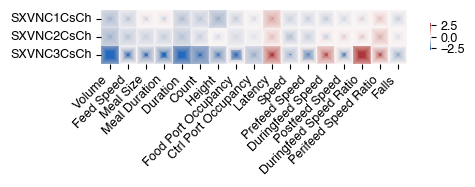

In [ ]:
# spw1118, aw1118, mean_deltaw1118 = spiral_heatmap(contrasts, 21, indexw1118, 
#                            vectorselection, reverse_neg=False,  
#                            abs_rank = True, chop_tail = 2.5, delta_type = ['delta','delta','delta','delta','delta',])
# spw1118.savefig(figurepath+ 'spw1118_21.png', dpi = 300)
# spw1118.savefig(figurepath+ 'spw1118_21.svg')

# spTrans, aTrans, mean_deltaTrans = spiral_heatmap(contrastsTrans, 21, indexTrans, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = ['deltadelta', 'deltadelta', 'deltadelta', 'deltadelta' ])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# aTrans.set_yticklabels(indexTrans, rotation = 0, ha = 'right')
# spTrans.savefig('spTrans_21.png', dpi = 300)
# spTrans.savefig('spTrans_21.svg')

# spTrh, aTrh, mean_deltaTrh = spiral_heatmap(contrastsTrh, 21, indexTrh, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = ['deltadelta', 'deltadelta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# aTrh.set_yticklabels(indexTrh, rotation = 0, ha = 'right')
# spTrh.savefig('spTrh_21.png', dpi = 300)
# spTrh.savefig('spTrh_21.svg')

spSplits, aSplits, mean_deltaSplits = spiral_heatmap(contrastsSplits, 21, indexSplits, 
                         vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 0, delta_type = ['delta','delta', 'delta'])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
aSplits.set_yticklabels(indexSplits, rotation = 0, ha = 'right')
# aSplits.set_yticklabels(['(R50 - Trh)CsCh', '(Trh - R50)CsCh','BrainTrhCsCh',  'VNCTrhCsCh', 'SXVNC1CsCh'], rotation = 0, ha = 'right')
spSplits.savefig(figurepath+ 'spSplits_21.png', dpi = 800)
spSplits.savefig(figurepath+ 'spSplits_21.svg')


# spIntersect, aIntersect, mean_deltaIntersect = spiral_heatmap(contrastsIntersect, 21, indexIntersect, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 0, delta_type = ['delta','delta','delta','delta','delta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# aIntersect.set_yticklabels(indexIntersect, rotation = 0, ha = 'right')
# spIntersect.savefig(figurepath+ 'spIntersect_21.png', dpi = 800)
# spIntersect.savefig(figurepath+ 'spIntersect_21.svg')


# spMeta, aMeta, mean_deltaMeta = spiral_heatmap(contrastsMeta, 21, indexMeta, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = ['delta', 'delta', 'delta', 'delta', 'delta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spMeta.savefig(figurepath+'spMeta_21.png', dpi = 300)
# spMeta.savefig(figurepath+'spMeta_21.svg')


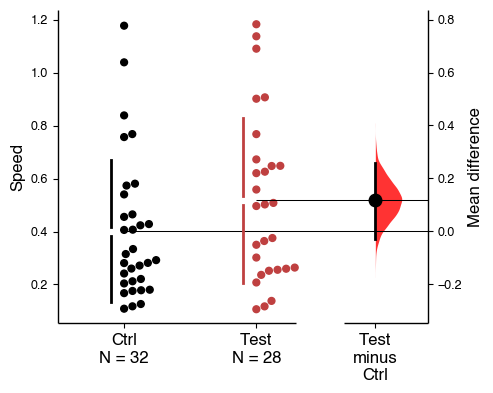

In [ ]:
contrastsMeta[4][10].mean_diff.plot(custom_palette=['k', 'r']);

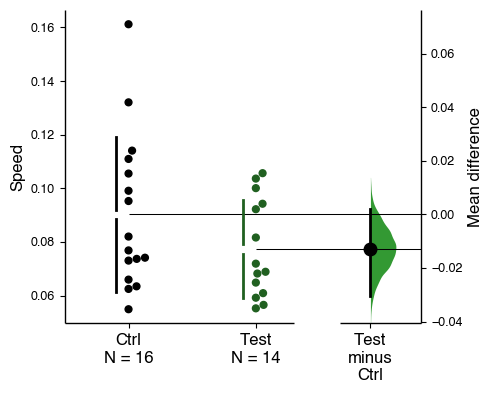

In [ ]:
contrastsMeta[1][10].mean_diff.plot(custom_palette=['k', 'g']);

In [ ]:
deltas=mean_deltaw1118.append(mean_deltaTrans).append(mean_deltaIntersect).append(mean_deltaMeta).append(mean_deltaSplits)
indices = np.concatenate([indexw1118, indexTrans,indexIntersect, indexMeta, indexSplits])
allContrasts = np.concatenate([contrasts,contrastsTrans, contrastsIntersect, contrastsMeta, contrastsSplits], axis = 0)
delta_types = np.array(['delta', 'delta', 'delta', 'delta', 'delta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'delta', 'delta', 'delta', 'delta', 'delta','delta','delta', 'delta', 'delta', 'delta', 'delta', 'delta', 'delta', ])



corr = deltas.T.corr()


[print(i, indices[i]) for i in range(len(indices))];
allind = np.arange(0, 22, 1)
trhmeta_f = np.array([0, 2, 4, 6, 8, 15, 16])
trhmeta_st = np.array([0,1, 3, 5, 7, 14, 17, 18])
trh_inter = np.array([ 3, 4, 5, 6, 9,  10, 11, 12, 13])


0 baseline
1 24 hr starved
2 24 hr reversed
3 48 hr starved
4 48 hr reversed
5 TrhACR1
6 TrhCsCh
7 R50CsCh
8 R50ACR1
9 TLRG
10 RLTG
11 TrhGal4TshGal80CsCh
12 TrhVNCCsCh
13 TrhVNCACR1
14 NPFCsCh
15 NPFACR1
16 AKH3CsCh
17 AKH2ACR
18 Dilp2CsCh
19 SXVNC1CsCh
20 SXVNC2CsCh
21 SXVNC3CsCh


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/2838935256.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deltas=mean_deltaw1118.append(mean_deltaTrans).append(mean_deltaIntersect).append(mean_deltaMeta).append(mean_deltaSplits)
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/2838935256.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deltas=mean_deltaw1118.append(mean_deltaTrans).append(mean_deltaIntersect).append(mean_deltaMeta).append(mean_deltaSplits)
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/2838935256.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deltas=mean_deltaw1118.append(mean_deltaTrans).append(mean_deltaIntersect).append(mean_deltaMeta).appen

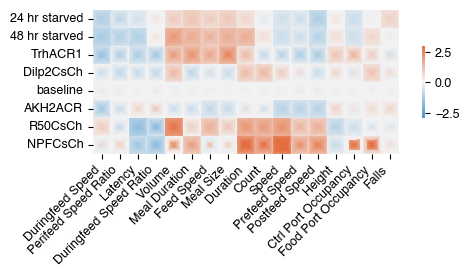

In [ ]:


# # mask = np.triu(np.ones_like(corr, dtype=bool))
# # f, ax = plt.subplots(figsize=(4, 3))
# fclu = sns.clustermap(deltas.iloc[ allind], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3, xticklabels=True, yticklabels=True)
# fclu.figure.set_size_inches(5, 5)
# fclu.figure.savefig(figurepath+'clustermap.svg')
# fclu.figure.savefig(figurepath+'clustermap.png')
# newind = allind[fclu.dendrogram_row.reordered_ind]
sp_allind, a_allind, mean_delta_allind = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  cmap = divmap, chop_tail = 2.5, vmax = 3, vmin = -2.9, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_allind.savefig(figurepath+'spiralclustermap_allind.svg')
sp_allind.savefig(figurepath+'spiralclustermap_allind.png', dpi= 300)

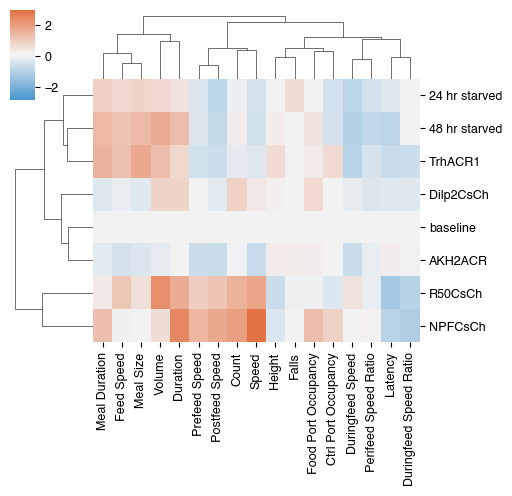

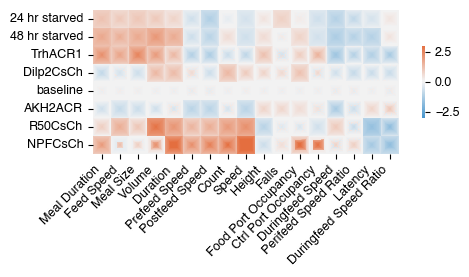

In [ ]:


# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_st = sns.clustermap(deltas.iloc[ trhmeta_st], cmap=divmap, method = 'average', figsize=(6, 5), vmin=-2.8, vmax=3)
fclu_st.figure.set_size_inches(5, 5)
fclu_st.figure.savefig(figurepath+'clustermap_st.svg')
fclu_st.figure.savefig(figurepath+'clustermap_st.png')
newind = trhmeta_st[fclu_st.dendrogram_row.reordered_ind]
sp_st, a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_st.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,  cmap = divmap, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_st.savefig(figurepath+'spiralclustermap_st.svg')
sp_st.savefig(figurepath+'spiralclustermap_st.png', dpi= 300)

array([[11.        , 13.        ,  0.7764095 ,  2.        ],
       [ 1.        ,  2.        ,  0.85747763,  2.        ],
       [12.        , 15.        ,  1.07570264,  2.        ],
       [ 9.        , 14.        ,  1.16728729,  2.        ],
       [ 6.        , 16.        ,  1.19153718,  2.        ],
       [ 3.        , 18.        ,  1.4298379 ,  3.        ],
       [ 7.        ,  8.        ,  1.51318947,  2.        ],
       [ 5.        , 10.        ,  1.57484675,  2.        ],
       [17.        , 24.        ,  1.70365782,  4.        ],
       [21.        , 23.        ,  1.70435748,  4.        ],
       [ 0.        ,  4.        ,  2.08338376,  2.        ],
       [19.        , 20.        ,  2.16752506,  4.        ],
       [26.        , 28.        ,  2.29973959,  8.        ],
       [22.        , 27.        ,  2.43936219,  5.        ],
       [25.        , 29.        ,  3.12306191, 12.        ],
       [30.        , 31.        ,  3.43271252, 17.        ]])

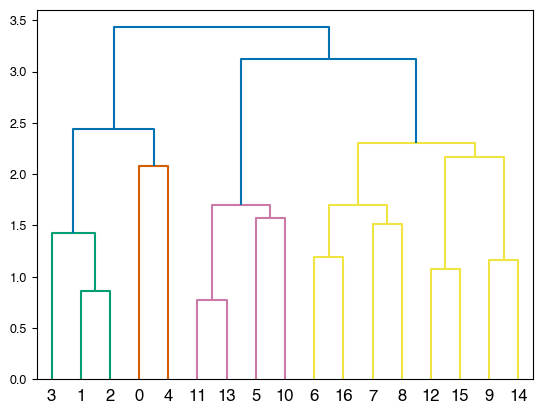

In [ ]:


Z

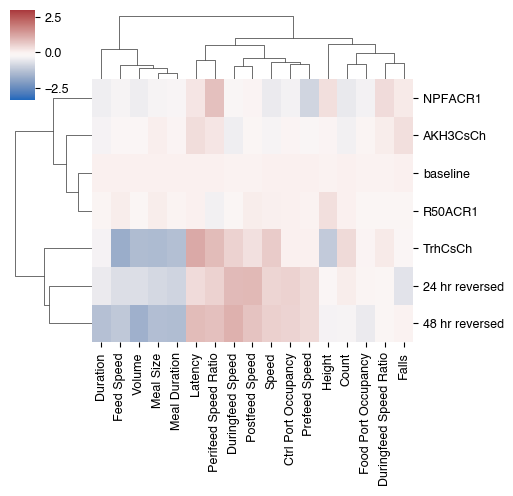

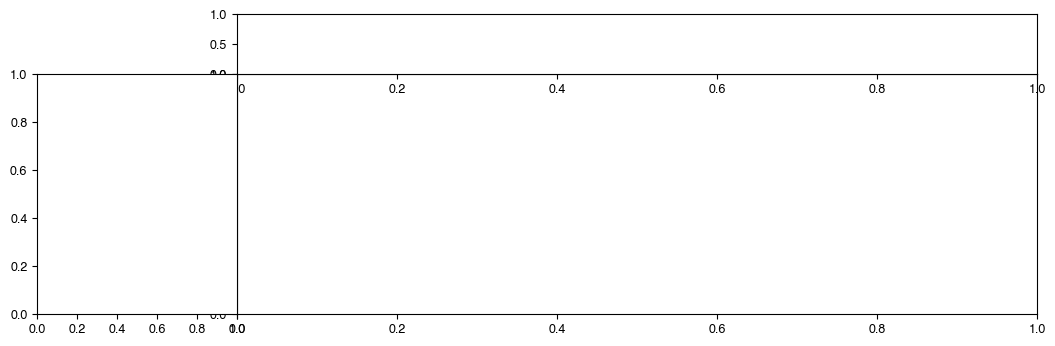

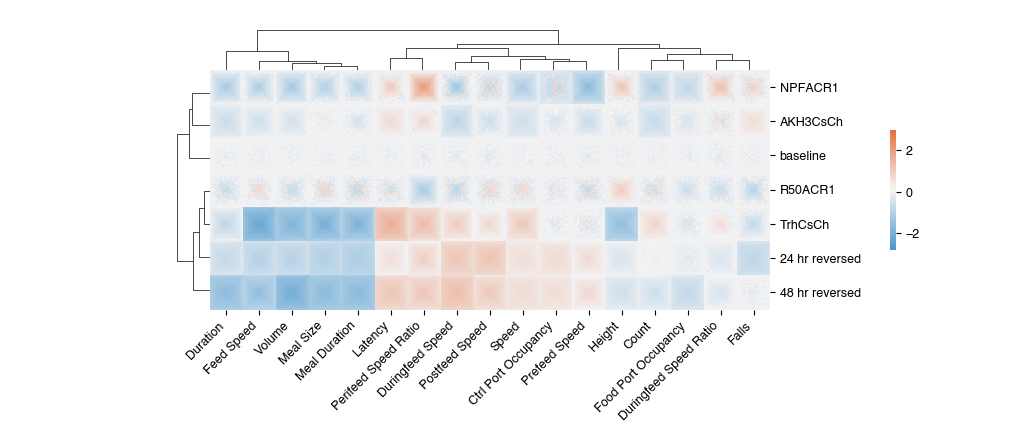

In [ ]:
fclu_f = sns.clustermap(deltas.iloc[trhmeta_f], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_f.figure.set_size_inches(5, 5)
fclu_f.figure.savefig(figurepath+'clustermap_f.svg')
fclu_f.figure.savefig(figurepath+'clustermap_f.png')
newind = trhmeta_f[fclu_f.dendrogram_row.reordered_ind]
from scipy.cluster import hierarchy
Zy = hierarchy.linkage(deltas.iloc[ trhmeta_f], 'average')
Zx = hierarchy.linkage(deltas.iloc[ trhmeta_f].T, 'average')
f = plt.figure(figsize=(10, 3));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_f.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,  cmap = divmap, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind], ax =ax);

hierarchy.set_link_color_palette(['k', 'k', 'k'])
with plt.rc_context({'lines.linewidth': 0.5}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx, 
                               above_threshold_color='k');
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, orientation = 'right', 
                               above_threshold_color='k');
ax_denx.set_ylim(0, 4)
ax_denx.set_xlim(0, 245)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(-1, 2+10*len(newind))
ax_deny.set_xlim(20,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

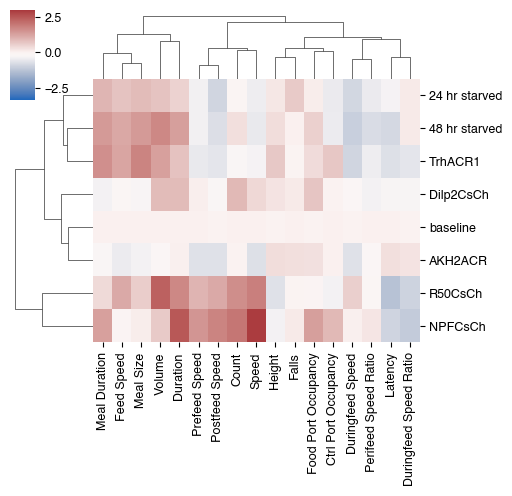

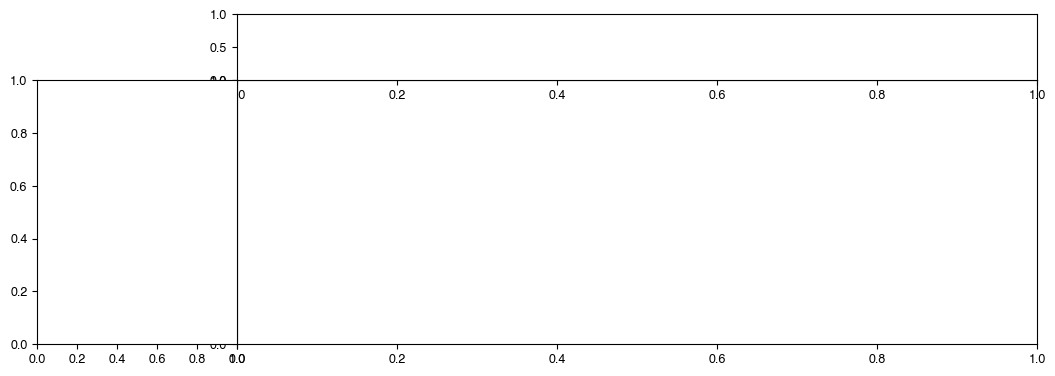

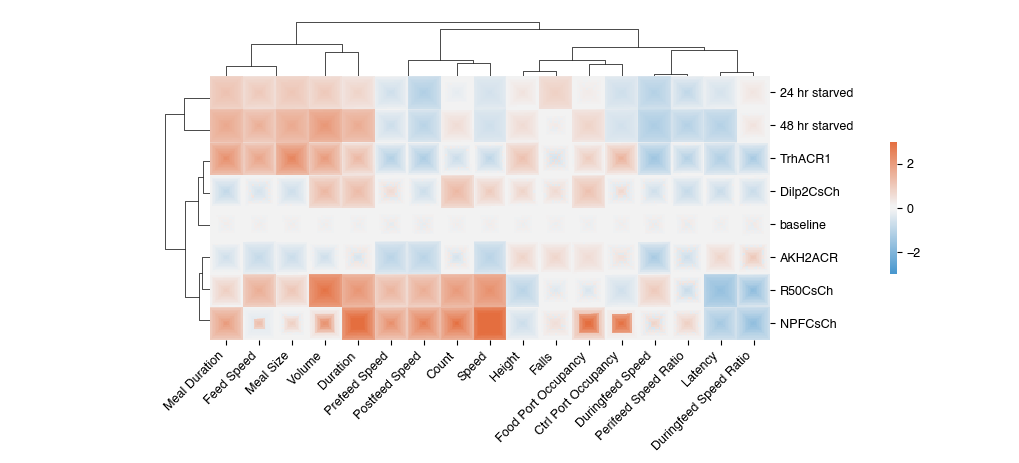

In [ ]:
fclu_st = sns.clustermap(deltas.iloc[trhmeta_st], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_st.figure.set_size_inches(5, 5)
fclu_st.figure.savefig(figurepath+'clustermap_st.svg')
fclu_st.figure.savefig(figurepath+'clustermap_st.png')
newind = trhmeta_st[fclu_st.dendrogram_row.reordered_ind]
##### from scipy.cluster import hierarchy
Zy = hierarchy.linkage(deltas.iloc[ trhmeta_st], 'average')
Zx = hierarchy.linkage(deltas.iloc[ trhmeta_st].T, 'average')
f = plt.figure(figsize=(10, 3.3));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_st.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,  cmap = divmap, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind], ax =ax, vmin = -3);

hierarchy.set_link_color_palette(['k', 'k', 'k'])
with plt.rc_context({'lines.linewidth': 0.5}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx, 
                               above_threshold_color='k');
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, orientation = 'right', 
                               above_threshold_color='k');
ax_denx.set_ylim(1, 4)
ax_denx.set_xlim(0, 243)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(-1, 2+10*len(newind))
ax_deny.set_xlim(20,1)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

### ax_deny.get_ylim()


##### f

len(Zy)

In [ ]:
ax.get_xlim()

(0.0, 357.0)

# indices[newind]

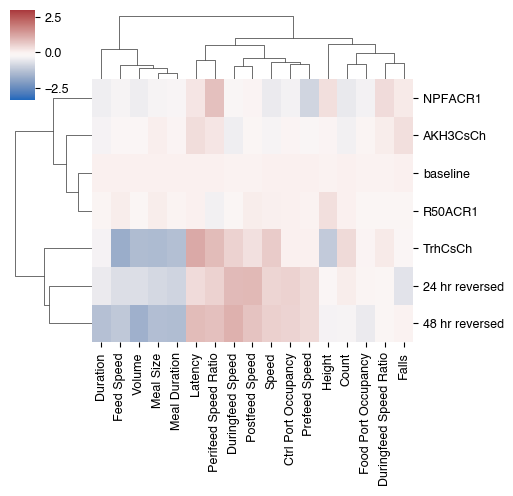

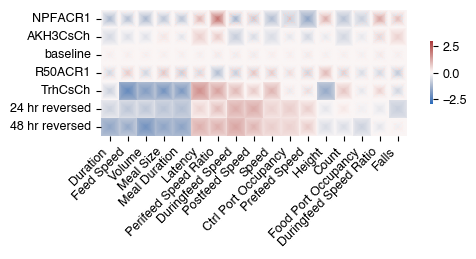

In [ ]:

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_f = sns.clustermap(deltas.iloc[trhmeta_f], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_f.figure.set_size_inches(5, 5)
fclu_f.figure.savefig(figurepath+'clustermap_f.svg')
fclu_f.figure.savefig(figurepath+'clustermap_f.png')
newind = trhmeta_f[fclu_f.dendrogram_row.reordered_ind]

sp_f, a_f, mean_delta_f = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_f.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_f.savefig(figurepath+'spiralclustermap_f.svg')
sp_f.savefig(figurepath+'spiralclustermap_f.png', dpi= 300)


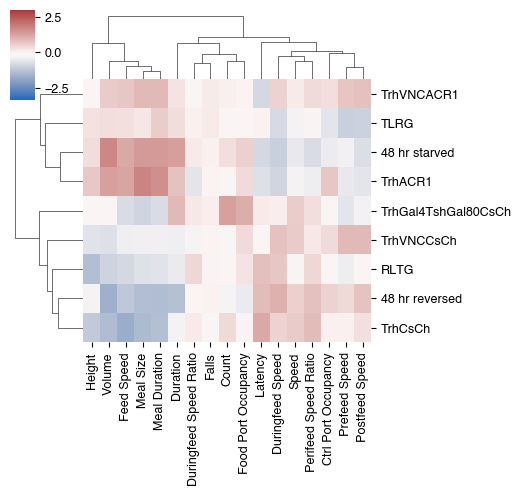

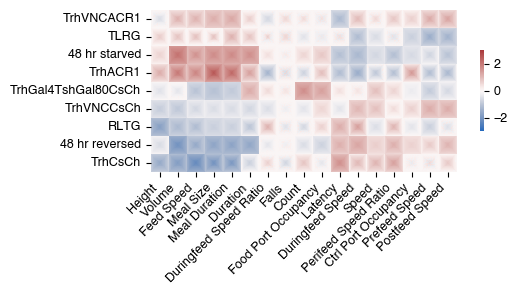

In [ ]:

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_inter = sns.clustermap(deltas.iloc[trhintersect], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_inter.figure.set_size_inches(5, 5)
fclu_inter.figure.savefig(figurepath+'clustermap_inter.svg')
fclu_inter.figure.savefig(figurepath+'clustermap_inter.png')
newind = trh_inter[fclu_inter.dendrogram_row.reordered_ind]

sp_inter, a_inter, mean_delta_inter = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_inter.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_inter.savefig(figurepath+'spiralclustermap_inter.svg')
sp_inter.savefig(figurepath+'spiralclustermap_inter.png', dpi= 300)


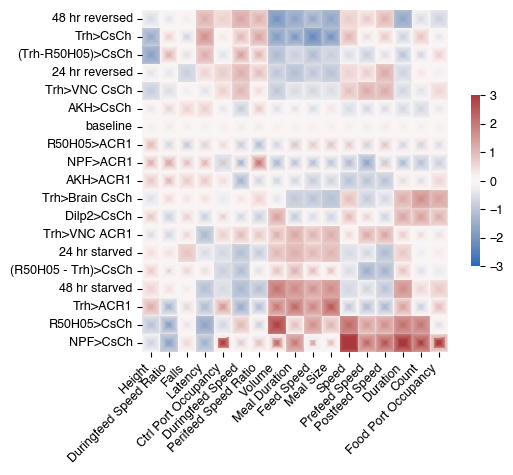

In [ ]:
yticklabels_dict={'48 hr reversed':'48 hr reversed',
                 'TrhCsCh':'Trh>CsCh',
                  'RLTG':'(Trh-R50H05)>CsCh',
                  '24 hr reversed':'24 hr reversed',
                  'TrhVNCCsCh': 'Trh>VNC CsCh',
                  'AKH3CsCh': 'AKH>CsCh',
                  'baseline': 'baseline',
                  'R50ACR1': 'R50H05>ACR1',
                  'NPFACR1': 'NPF>ACR1',
                  'AKH2ACR': 'AKH>ACR1',
                  'TrhGal4TshGal80CsCh': 'Trh>Brain CsCh',
                  'Dilp2CsCh': 'Dilp2>CsCh',
                  'TrhVNCACR1': 'Trh>VNC ACR1',
                  '24 hr starved': '24 hr starved',
                  'TLRG': '(R50H05 - Trh)>CsCh',
                  '48 hr starved': '48 hr starved',
                  'TrhACR1': 'Trh>ACR1',
                  'R50CsCh': 'R50H05>CsCh',
                  'NPFCsCh': 'NPF>CsCh',
                 }

yticklabels = [yticklabels_dict[item.get_text()] for item in spBig.axes[0].get_yticklabels()]
spBig.axes[0].set_yticklabels(yticklabels)
spBig

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_31644/3822172817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deltas_small=mean_deltaTrh.append(mean_deltaSplits)


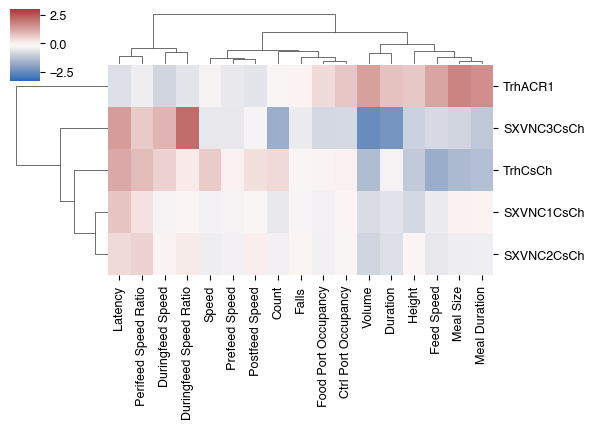

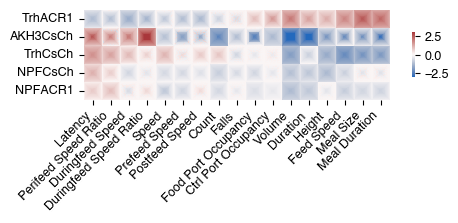

In [ ]:
deltas_small=mean_deltaTrh.append(mean_deltaSplits)
indices_small = np.concatenate([indexTrh, indexMeta, ])
allContrasts_small = np.concatenate([contrastsTrh, contrastsSplits], axis = 0)
delta_types_small = [  'deltadelta', 'deltadelta', 'delta','delta', 'delta']

corr_small = deltas.T.corr()

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_small = sns.clustermap(deltas_small, cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3)
fclu_small.figure.set_size_inches(6, 4)
fclu_small.figure.savefig(figurepath+'clustermap_small.svg')
fclu_small.figure.savefig(figurepath+'clustermap_small.png')


spBig_small, aBig_small, mean_deltaBig_small = spiral_heatmap(allContrasts_small[fclu_small.dendrogram_row.reordered_ind], 
                                            21, indices_small[fclu_small.dendrogram_row.reordered_ind], 
                         vectorselection, sort_by = fclu_small.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = [delta_types_small[i] for i in fclu_small.dendrogram_row.reordered_ind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
spBig_small.savefig(figurepath+'spiralclustermap_small.svg')
spBig_small.savefig(figurepath+'spiralclustermap_small.png', dpi= 300)

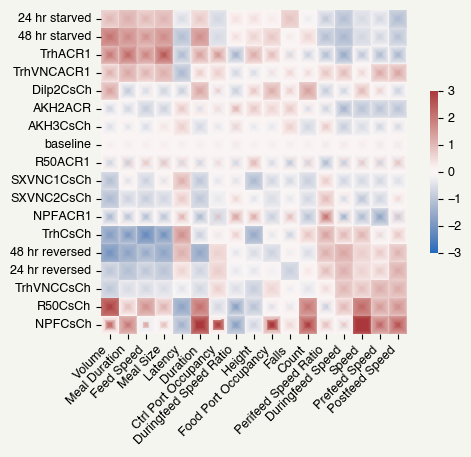

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
# pairs = [['NPFACR1', 'SXVNC2CsCh'], ['TrhVNCACR1', 'Dilp2CsCh'], ['TrhACR1', '48 hr starved'],
# ['TrhCsCh', '48 hr reversed'],['TrhVNCCsCh', '24 hr reversed'], ['R50CsCh', 'NPFCsCh']]
pairs = [ ['TrhACR1', '48 hr starved'],
['TrhCsCh', '48 hr reversed']]





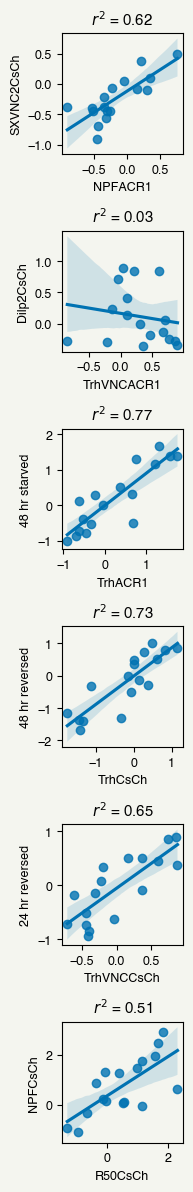

In [ ]:
f, ax = plt.subplots(6, 1, facecolor=[244/255, 245/255, 239/255])

f.set_size_inches(2, 12)
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
for i in range(len(pairs)):
    sns.regplot( x = deltas.loc[pairs[i][0]], y =  deltas.loc[pairs[i][1]], ax = ax.flatten()[i])
    ax.flatten()[i].set_title(r'$r^2$ = ' + str(np.round(r2(deltas.loc[pairs[i][0]], deltas.loc[pairs[i][1]]), 2)))
    # ax.flatten()[i].set_facecolor([244/255, 245/255, 239/255])
f.tight_layout()
f.savefig(figurepath + 'effCorr.svg')
f.savefig(figurepath + 'effCorr.png', dpi = 300)

In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'clusterspiral.svg').scale(0.03),
    Text("A", 0.2, 0.02, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'effCorr.svg').scale(0.016),
    Text("B", 0.2, 0.02, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 15.5),
    ).save(figurepath+"/Figure5.svg")



##### 